In [21]:
import numpy as np, pandas as pd, sklearn.preprocessing as pre, tensorflow as tf, matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix as skm
from keras.utils import np_utils

In [22]:
url_red='https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
url_white='https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv'
red=pd.read_csv(url_red, sep=';',header=0)
white=pd.read_csv(url_white,sep=';',header=0)

# NaN value check and clearning
print('the proportion of NaN value in the red wine dataset ',red.isna().sum().sum()/red.sum().sum())
print('the proportion of NaN value in the white wine dataset ',white.isna().sum().sum()/white.sum().sum())

red=red.dropna(axis=0,how='all')
red['type']='Red Wine'
white=white.dropna(axis=0,how='all')
white['type']='White Wine'
#Combination of both types of wine
wine=pd.concat([red,white])

#Make the wine type and wine quality as catergorical data
wine.loc[wine['type'] == 'Red Wine','type'] = 0
wine.loc[wine['type'] == 'White Wine','type'] = 1

wine.loc[wine['quality'] == 1,'quality'] = 0
wine.loc[wine['quality'] == 2,'quality'] = 0
wine.loc[wine['quality'] == 3,'quality'] = 1
wine.loc[wine['quality'] == 4,'quality'] = 1
wine.loc[wine['quality'] == 5,'quality'] = 2
wine.loc[wine['quality'] == 6,'quality'] = 2
wine.loc[wine['quality'] == 7,'quality'] = 3
wine.loc[wine['quality'] == 8,'quality'] = 3
wine.loc[wine['quality'] == 9,'quality'] = 4
wine.loc[wine['quality'] == 10,'quality'] = 4

the proportion of NaN value in the red wine dataset  0.0
the proportion of NaN value in the white wine dataset  0.0


In [23]:
print(sum(wine.quality[wine.quality==0]))
print(sum(wine.quality[wine.quality==1]))
print(sum(wine.quality[wine.quality==2]))
print(sum(wine.quality[wine.quality==3]))
print(sum(wine.quality[wine.quality==4]))

(9948+3816)/sum(wine.quality)


0
246
9948
3816
20


0.98104062722737

In [24]:
wine.head(5)
len(wine)
#wine.describe()

6497

In [25]:
#Explaintory Data Analysis
#To examine whether the dataset has outliers
outliers_percentages= []
outlier_names=[]
for number in range(wine.shape[1]):
    min_threshold = wine[wine.columns[number]].mean()- (3 * wine[wine.columns[number]].std())
    max_threshold = wine[wine.columns[number]].mean()+ (3 * wine[wine.columns[number]].std())
    count = 0
    for data in wine[wine.columns[number]]:
        if data < min_threshold or data > max_threshold:
            count += 1
    percentage = count/wine.shape[0]
    if percentage>=0.01:
        outlier_names.append(wine.columns[number])
        outliers_percentages.append(float("%.3f" % percentage))
print(outlier_names,outliers_percentages)
print('Upon variables has more outliers than the others')
print('The other variables are normally distributed')

['fixed acidity', 'volatile acidity', 'chlorides', 'sulphates'] [0.02, 0.015, 0.016, 0.012]
Upon variables has more outliers than the others
The other variables are normally distributed


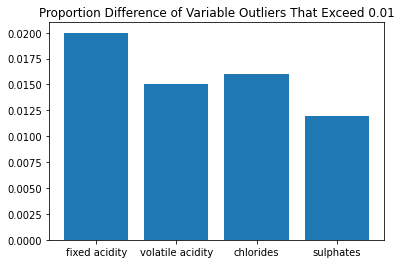

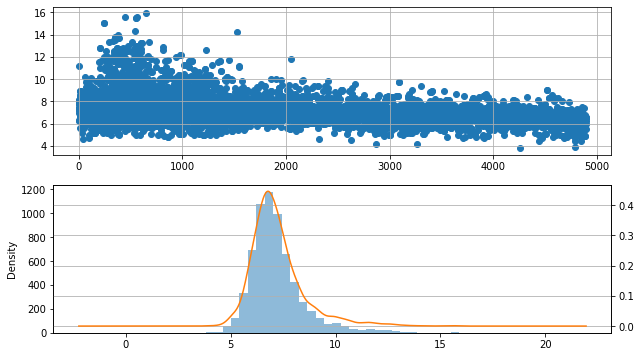

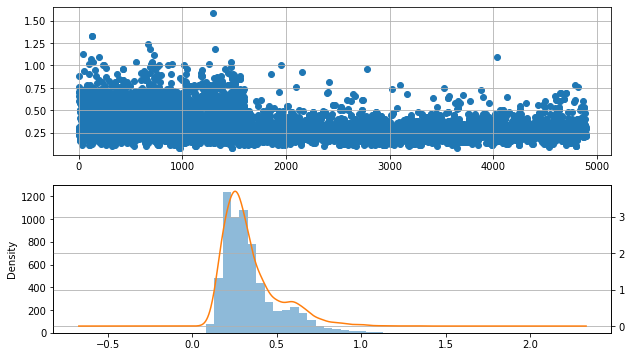

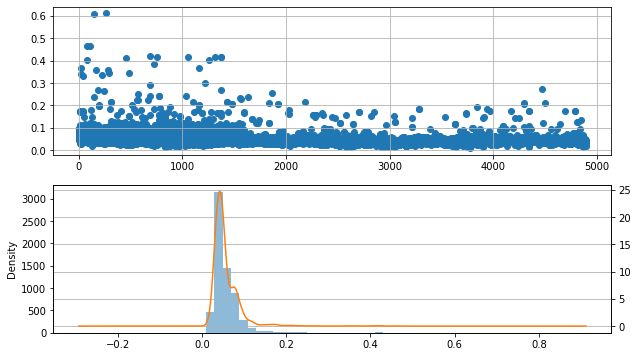

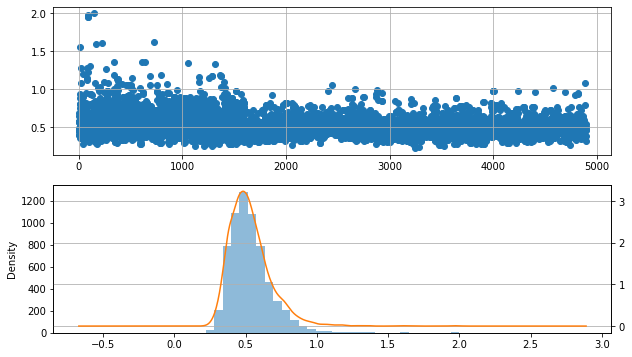

In [26]:
#Visualise the variance difference
plt.bar(outlier_names,height=outliers_percentages)
plt.title('Proportion Difference of Variable Outliers That Exceed 0.01')

fig = plt.figure(figsize = (10,6))
ax1 = fig.add_subplot(2,1,1)  # fixed acidity
ax1.scatter(wine['fixed acidity'].index, wine['fixed acidity'].values)
plt.grid()
 
ax2 = fig.add_subplot(2,1,2)  # fixed acidity
wine['fixed acidity'].hist(bins=30,alpha = 0.5,ax = ax2)
wine['fixed acidity'].plot(kind = 'kde', secondary_y=True,ax = ax2)
plt.grid()


fig = plt.figure(figsize = (10,6))
ax1 = fig.add_subplot(2,1,1)  # volatile acidity
ax1.scatter(wine['volatile acidity'].index, wine['volatile acidity'].values)
plt.grid()
 
ax2 = fig.add_subplot(2,1,2)  # volatile acidity
wine['volatile acidity'].hist(bins=30,alpha = 0.5,ax = ax2)
wine['volatile acidity'].plot(kind = 'kde', secondary_y=True,ax = ax2)
plt.grid()

fig = plt.figure(figsize = (10,6))
ax1 = fig.add_subplot(2,1,1)  # chlorides
ax1.scatter(wine['chlorides'].index, wine['chlorides'].values)
plt.grid()
 
ax2 = fig.add_subplot(2,1,2)  # chlorides
wine['chlorides'].hist(bins=30,alpha = 0.5,ax = ax2)
wine['chlorides'].plot(kind = 'kde', secondary_y=True,ax = ax2)
plt.grid()

fig = plt.figure(figsize = (10,6))
ax1 = fig.add_subplot(2,1,1)  # sulphates
ax1.scatter(wine['sulphates'].index, wine['sulphates'].values)
plt.grid()
 
ax2 = fig.add_subplot(2,1,2)  # sulphates
wine['sulphates'].hist(bins=30,alpha = 0.5,ax = ax2)
wine['sulphates'].plot(kind = 'kde', secondary_y=True,ax = ax2)
plt.grid()

In [27]:
#Get ride of the outliers
for number in range(wine.shape[1]):
    dataset=wine.mask((wine[wine.columns[number]] - wine[wine.columns[number]].mean()).abs() > 3 * wine[wine.columns[number]].std()).dropna()

#Split the dataset into training and test sets 80%-20%
X=dataset.iloc[:,:-2]
y=dataset.iloc[:,12:13].values.astype(int)
y_1=np_utils.to_categorical(y,2)
train_x,test_x,train_y,test_y = train_test_split(X,y_1,train_size=0.8,test_size=0.2,random_state=5)

In [28]:
# Normalised the explainatory data
min_max_scaler = pre.MinMaxScaler()

min_max_scaler.fit(train_x)
train_x = min_max_scaler.transform(train_x)

min_max_scaler.fit(test_x)
test_x = min_max_scaler.transform(test_x)

0.9824494488562285


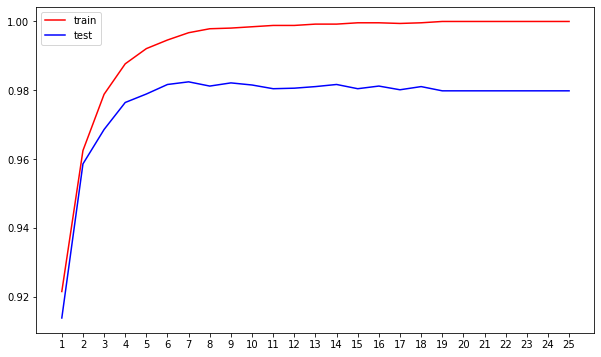

In [29]:
# Decision-Tree Model
from sklearn.metrics import classification_report as report
tr = []
te = []
for i in range(25):
    clf = DecisionTreeClassifier(random_state=5
                                 ,max_depth=i+1
                                 ,criterion="gini")
    clf = clf.fit(train_x, train_y)
    score_tr = clf.score(train_x,train_y)
    score_te = cross_val_score(clf,X,y,cv=10).mean()
    tr.append(score_tr)
    te.append(score_te)
print(max(te))
fig = plt.figure(figsize = (10,6))
plt.plot(range(1,26),tr,color="red",label="train")
plt.plot(range(1,26),te,color="blue",label="test")
plt.xticks(range(1,26))
plt.legend()
plt.show()

In [30]:
tr.index(max(tr))
te.index(max(te))

6

[[1212   88]
 [  88 1212]]
Accuracy  0.9323076923076923
CV Accuracy  0.974764252696456


Text(0.5, 1.0, 'Difference of Feature Importance Among the Variables')

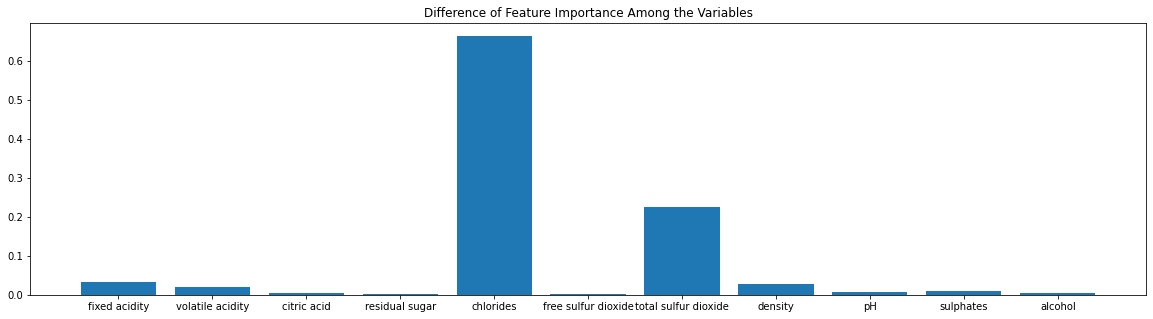

In [31]:
clf = DecisionTreeClassifier(criterion="gini",max_depth=10,random_state=5)
clf = clf.fit(train_x, train_y)
cf1=skm(test_y.reshape(-1), clf.predict(test_x).reshape(-1), labels=[0,1])
print(cf1)
print('Accuracy ',(cf1[0,0]+cf1[1,1])/sum(sum(cf1)))

score = cross_val_score(clf,X,y_1,cv=10).mean()
print('CV Accuracy ',score)

fig = plt.figure(figsize = (20,5))
plt.bar(X.columns,height=clf.feature_importances_)
plt.title('Difference of Feature Importance Among the Variables')

In [32]:
# Use the prune function to ease overfitting
for i in [3,5,10]:
    for j in [0.1,0.2,0.3,0.4,0.5]:
        clf = DecisionTreeClassifier(criterion="gini",min_samples_leaf = j,max_depth=i,random_state=5)
        clf = clf.fit(train_x, train_y)
        cf1=skm(test_y.reshape(-1), clf.predict(test_x).reshape(-1), labels=[0,1])
        print(i,j)
        print(cf1)
        print('Accuracy ',(cf1[0,0]+cf1[1,1])/sum(sum(cf1)))

        score = cross_val_score(clf,X,y_1,cv=10).mean()
        print('CV Accuracy ',score)

3 0.1
[[1162  138]
 [ 138 1162]]
Accuracy  0.8938461538461538
CV Accuracy  0.8958250562996326
3 0.2
[[1187  113]
 [ 113 1187]]
Accuracy  0.9130769230769231
CV Accuracy  0.9179736873296195
3 0.3
[[1184  116]
 [ 116 1184]]
Accuracy  0.9107692307692308
CV Accuracy  0.8173554581012208
3 0.4
[[1109  191]
 [ 191 1109]]
Accuracy  0.8530769230769231
CV Accuracy  0.6408403460945834
3 0.5
[[996 304]
 [304 996]]
Accuracy  0.7661538461538462
CV Accuracy  0.754
5 0.1
[[1162  138]
 [ 138 1162]]
Accuracy  0.8938461538461538
CV Accuracy  0.8958250562996326
5 0.2
[[1187  113]
 [ 113 1187]]
Accuracy  0.9130769230769231
CV Accuracy  0.9179736873296195
5 0.3
[[1184  116]
 [ 116 1184]]
Accuracy  0.9107692307692308
CV Accuracy  0.8173554581012208
5 0.4
[[1109  191]
 [ 191 1109]]
Accuracy  0.8530769230769231
CV Accuracy  0.6408403460945834
5 0.5
[[996 304]
 [304 996]]
Accuracy  0.7661538461538462
CV Accuracy  0.754
10 0.1
[[1162  138]
 [ 138 1162]]
Accuracy  0.8938461538461538
CV Accuracy  0.8958250562996326

10 0.5
[[1187  113]
 [ 113 1187]]
Accuracy  0.9130769230769231
CV Accuracy  0.9179736873296195


Text(0.5, 1.0, 'Difference of Feature Importance Among the Variables')

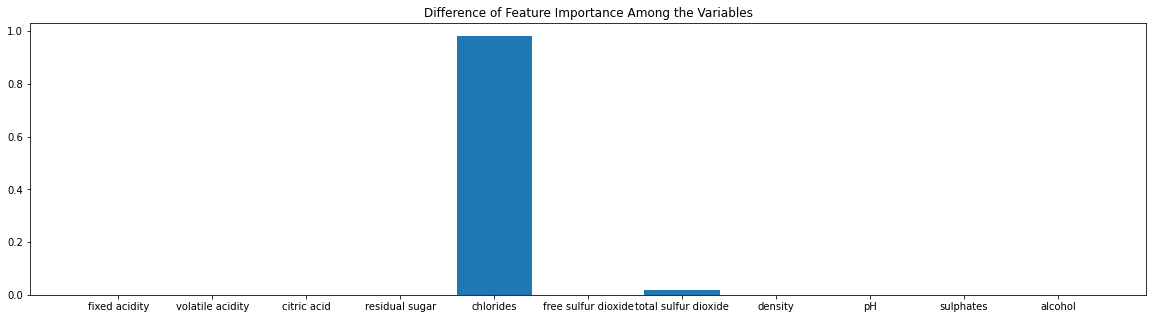

In [33]:
# min_samples_leaf = 0.2 & max_depth=3 has the best parameters
clf = DecisionTreeClassifier(criterion="gini",min_samples_leaf =0.2,max_depth=3,random_state=5)
clf = clf.fit(train_x, train_y)
cf1=skm(test_y.reshape(-1), clf.predict(test_x).reshape(-1), labels=[0,1])
print(i,j)
print(cf1)
print('Accuracy ',(cf1[0,0]+cf1[1,1])/sum(sum(cf1)))

score = cross_val_score(clf,X,y_1,cv=10).mean()
print('CV Accuracy ',score)

fig = plt.figure(figsize = (20,5))
plt.bar(X.columns,height=clf.feature_importances_)
plt.title('Difference of Feature Importance Among the Variables')

In [34]:
#Bagging Classifier
from sklearn.ensemble import BaggingRegressor
score_m=[]
for i in range(10,51):
    bagr = BaggingRegressor(n_estimators=i,max_features=11,random_state=5)
    bagr.fit(train_x, train_y)
    bagr_predict = bagr.predict(test_x)
    score=bagr.score(test_x,test_y)
    score_m.append(score)


The Number of Estimators Got the Maximum Score  18
Accuracy  0.6117969510181032
CV Accuracy  0.09443138607596882


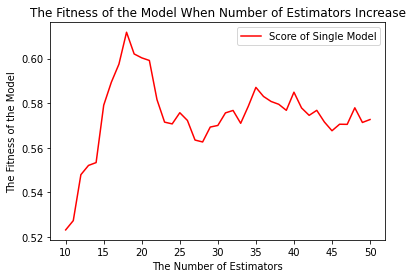

In [35]:
plt.ylabel('The Fitness of the Model')
plt.xlabel('The Number of Estimators')
plt.title('The Fitness of the Model When Number of Estimators Increase')
plt.plot(range(10,51),score_m,'-r', label='Score of Single Model')
plt.legend()

print('The Number of Estimators Got the Maximum Score ', score_m.index(max(score_m))+10)

bagr = BaggingRegressor(n_estimators=18,max_features=11,random_state=5)
bagr.fit(train_x, train_y)
bagr_predict = bagr.predict(test_x)
score=bagr.score(test_x,test_y)
print('Accuracy ',score)

score = cross_val_score(bagr,X,y_1,cv=10).mean()
print('CV Accuracy ',score)

0.93
[[1218   82]
 [  91 1209]]
Accuracy  0.9334615384615385
CV Accuracy  0.9906146734621311


Text(0.5, 1.0, 'Difference of Feature Importance Among the Variables')

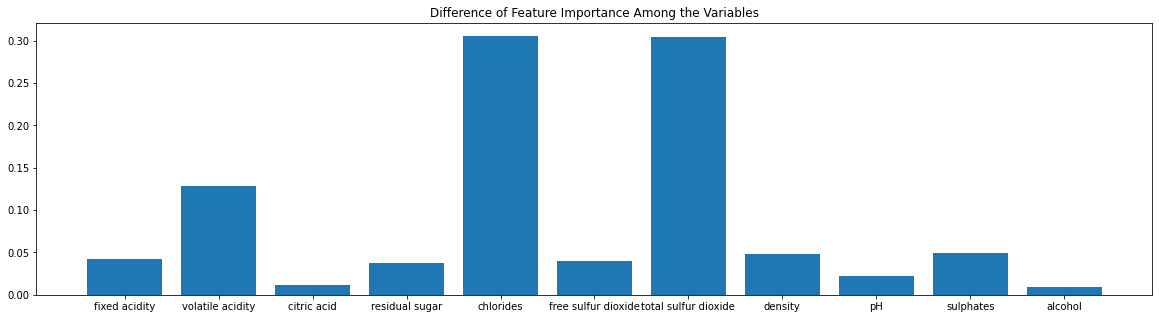

In [36]:
# RandomForest Classifier
from sklearn.ensemble import RandomForestClassifier
random = RandomForestClassifier(n_estimators = 100, criterion = 'gini', random_state = 5)
random.fit(train_x,train_y)
random_predict = random.predict(test_x)
score=random.score(test_x,test_y)
print(score)
cf2=skm(test_y.reshape(-1), random.predict(test_x).reshape(-1), labels=[0,1])
print(cf2)
print('Accuracy ',(cf2[0,0]+cf2[1,1])/sum(sum(cf2)))
score = cross_val_score(random,X,y_1,cv=10).mean()
print('CV Accuracy ', score)

fig = plt.figure(figsize = (20,5))
plt.bar(X.columns,height=random.feature_importances_)
plt.title('Difference of Feature Importance Among the Variables')

In [37]:
#Build ANN Model
from keras.models import Sequential
from keras.layers import Dense,Dropout
from tensorflow.keras import layers

units=[16,32,64,128]
for unit in units:
    model = Sequential([
    tf.keras.Input(shape=(11,)),
    layers.Dense(unit,activation='relu'),
    layers.Dense(unit,activation='relu'),
    layers.Dense(unit,activation='relu'),
    layers.Dropout(0.25),
    layers.Dense(2,activation='softmax')
    ])
    model.summary()

    model.compile(loss='binary_crossentropy',optimizer='adam',metrics=["accuracy"])

    score=loss, accuracy = model.evaluate(test_x, test_y, verbose=0)
    print('loss = ',score[0], 'accuracy= ', score[1])

    score=loss, accuracy = model.evaluate(X, y_1, verbose=0)
    print('loss = ',score[0], 'accuracy= ', score[1])
#So 32 units is the best solutions

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                192       
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 16)                272       
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_3 (Dense)             (None, 2)                 34        
                                                                 
Total params: 770
Trainable params: 770
Non-trainable params: 0
_________________________________________________________________
loss =  0.6854801774024963 accuracy=  0.7407692074775696
l

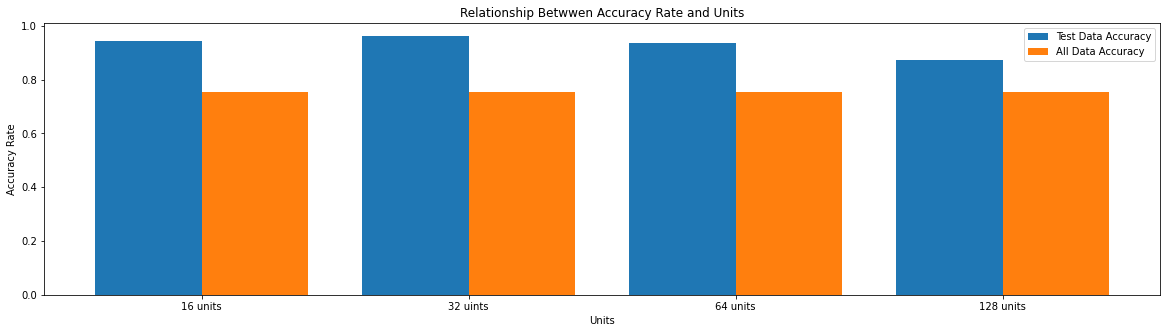

In [38]:
test_score=[0.944615364074707,0.9623076915740967,0.936923086643219,0.8730769157409668]
test_score=["%.3f" % elem for elem in test_score]
test_score=[float(i) for i in test_score]


data_score=[0.7538864016532898,0.7538864016532898,0.7538864016532898,0.7540403008460999]
data_score=["%.3f" % elem for elem in data_score]
data_score=[float(i) for i in data_score]

units_name=['16 units','32 uints','64 units','128 units']

X_axis = np.arange(len(units_name))
fig = plt.figure(figsize = (20,5))  
plt.bar(X_axis - 0.2, test_score, 0.4, label = 'Test Data Accuracy')
plt.bar(X_axis + 0.2, data_score, 0.4, label = 'All Data Accuracy')
  
plt.xticks(X_axis, units_name)
plt.xlabel("Units")
plt.ylabel("Accuracy Rate")
plt.title("Relationship Betwwen Accuracy Rate and Units")
plt.legend()
plt.show()

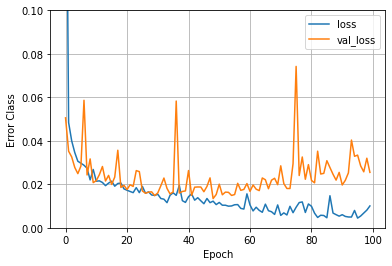

In [39]:
model_fit=model.fit(train_x, train_y, epochs=100, batch_size=32,verbose=0, validation_split = 0.20)

hist = pd.DataFrame(model_fit.history)
hist['epoch'] = model_fit.epoch
hist.tail()

def plot_loss(model_fit):
    plt.plot(model_fit.history['loss'], label='loss')
    plt.plot(model_fit.history['val_loss'], label='val_loss')
    plt.ylim([0, 0.1])
    plt.xlabel('Epoch')
    plt.ylabel('Error Class')
    plt.legend()
    plt.grid(True)

plot_loss(model_fit)

In [40]:
model = Sequential([
    tf.keras.Input(shape=(11,)),
    layers.Dense(32,activation='relu'),
    layers.Dense(32,activation='relu'),
    layers.Dense(32,activation='relu'),
    layers.Dropout(0.25),
    layers.Dense(2,activation='softmax')
    ])
model.summary()

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=["accuracy"])

model.fit(train_x, train_y, epochs=10, batch_size=32,verbose=0, validation_split = 0.20)

score=loss, accuracy = model.evaluate(test_x, test_y, verbose=0)
print('loss = ',score[0], 'accuracy= ', score[1])

score=loss, accuracy = model.evaluate(X, y_1, verbose=0)
print('loss = ',score[0], 'accuracy= ', score[1])

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 32)                384       
                                                                 
 dense_17 (Dense)            (None, 32)                1056      
                                                                 
 dense_18 (Dense)            (None, 32)                1056      
                                                                 
 dropout_4 (Dropout)         (None, 32)                0         
                                                                 
 dense_19 (Dense)            (None, 2)                 66        
                                                                 
Total params: 2,562
Trainable params: 2,562
Non-trainable params: 0
_________________________________________________________________
loss =  0.19976700842380524 accuracy=  0.94076925516

In [41]:
XX=dataset.iloc[:,:-2]
yy=dataset.iloc[:,11:12].values.astype(int)
yy=np_utils.to_categorical(yy,5)
train_xx,test_xx,train_yy,test_yy = train_test_split(XX,yy,train_size=0.8,test_size=0.2,random_state=5)

# Normalised the explainatory data
min_max_scaler = pre.MinMaxScaler()

min_max_scaler.fit(train_xx)
train_xx = min_max_scaler.transform(train_xx)

min_max_scaler.fit(test_xx)
test_xx = min_max_scaler.transform(test_xx)

0.7576923076923077
[[  0   0   0   0   0]
 [  0   0   0   0   0]
 [  0  53 985 261   1]
 [  0   0   0   0   0]
 [  0   0   0   0   0]]
Model Accuracy  0.7576923076923077
CV Accuracy  0.765575915609814


Text(0.5, 1.0, 'Difference of Feature Importance Among the Variables')

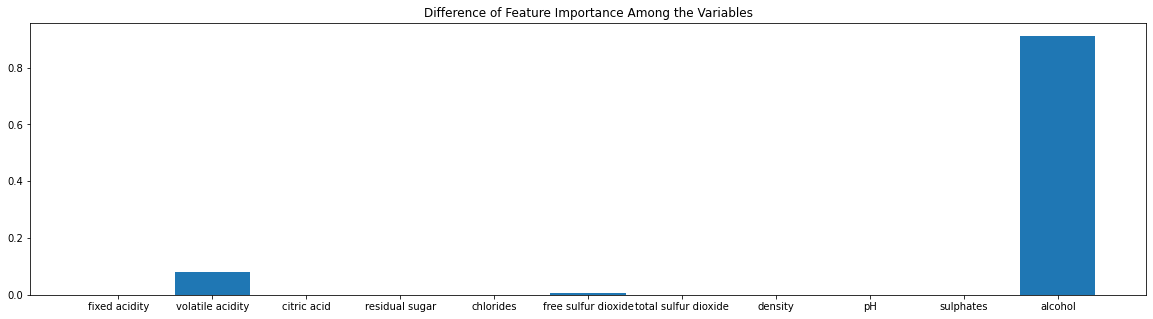

In [59]:
clf = DecisionTreeClassifier(criterion="gini",min_samples_leaf =0.2,max_depth=3,random_state=5)
clf = clf.fit(train_xx, train_yy)
print(clf.score(test_xx,test_yy))
cf1=skm(clf.predict(test_xx).argmax(axis=1),test_yy.argmax(axis=1))
cf1=np.insert(cf1,0,[0],axis=1)
cf1=np.insert(cf1,0,[0],axis=0)
print(cf1)
print('Model Accuracy ',(cf1[0,0]+cf1[1,1]+cf1[2,2]+cf1[3,3])/sum(sum(cf1)))

score = cross_val_score(clf,XX,yy,cv=10).mean()
print('CV Accuracy ',score)

fig = plt.figure(figsize = (20,5))
plt.bar(XX.columns,height=clf.feature_importances_)
plt.title('Difference of Feature Importance Among the Variables')

[[  0  12 105  54   0]
 [  0   0   0   0   0]
 [  0  41 809 122   1]
 [  0   0  71  85   0]
 [  0   0   0   0   0]]
Model Accuracy  0.6876923076923077
CV Accuracy  0.7808140334242029


Text(0.5, 1.0, 'Difference of Feature Importance Among the Variables')

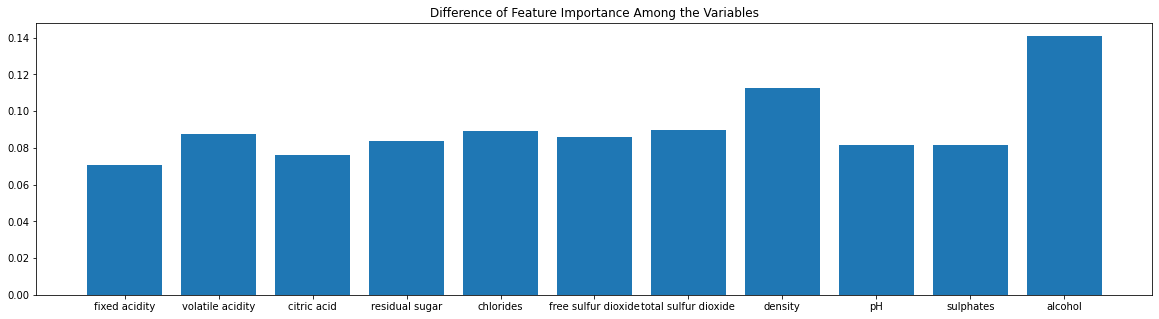

In [43]:
random = RandomForestClassifier(n_estimators = 100, criterion = 'gini', random_state = 5)
random.fit(train_xx,train_yy)
random_predict = random.predict(test_xx)
score=random.score(test_xx,test_yy)
print(skm(random.predict(test_xx).argmax(axis=1),test_yy.argmax(axis=1)))
cf1=skm(random.predict(test_xx).argmax(axis=1),test_yy.argmax(axis=1))
print('Model Accuracy ',(cf1[0,0]+cf1[1,1]+cf1[2,2]+cf1[3,3]+cf1[4,4])/sum(sum(cf1)))
score = cross_val_score(random,XX,yy,cv=10).mean()
print('CV Accuracy ', score)

fig = plt.figure(figsize = (20,5))
plt.bar(XX.columns,height=random.feature_importances_)
plt.title('Difference of Feature Importance Among the Variables')

In [44]:
model1 = Sequential([
    tf.keras.Input(shape=(11,)),
    layers.Dense(32,activation='relu'),
    layers.Dense(32,activation='relu'),
    layers.Dense(32,activation='relu'),
    layers.Dropout(0.25),
    layers.Dense(5,activation='softmax')
    ])
model1.summary()

model1.compile(loss='categorical_crossentropy',optimizer='adam',metrics=["accuracy"])

model1.fit(train_xx, train_yy, epochs=10, batch_size=32,verbose=0, validation_split = 0.20)

score=loss, accuracy = model1.evaluate(test_xx, test_yy, verbose=0)
print('loss = ',score[0], 'accuracy= ', score[1])

score=loss, accuracy = model1.evaluate(XX, yy, verbose=0)
print('loss = ',score[0], 'accuracy= ', score[1])

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 32)                384       
                                                                 
 dense_21 (Dense)            (None, 32)                1056      
                                                                 
 dense_22 (Dense)            (None, 32)                1056      
                                                                 
 dropout_5 (Dropout)         (None, 32)                0         
                                                                 
 dense_23 (Dense)            (None, 5)                 165       
                                                                 
Total params: 2,661
Trainable params: 2,661
Non-trainable params: 0
_________________________________________________________________
loss =  0.5604464411735535 accuracy=  0.750769257545

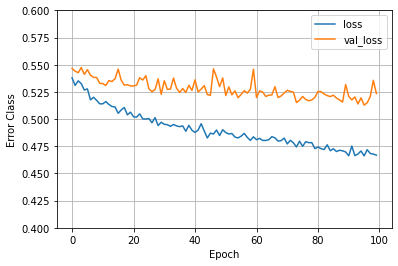

In [45]:
model_fit1=model1.fit(train_xx, train_yy, epochs=100, batch_size=32,verbose=0, validation_split = 0.20)

hist = pd.DataFrame(model_fit1.history)
hist['epoch'] = model_fit1.epoch
hist.tail()

def plot_loss(model_fit):
    plt.plot(model_fit1.history['loss'], label='loss')
    plt.plot(model_fit1.history['val_loss'], label='val_loss')
    plt.ylim([0.4, 0.6])
    plt.xlabel('Epoch')
    plt.ylabel('Error Class')
    plt.legend()
    plt.grid(True)

plot_loss(model_fit1)